611.2


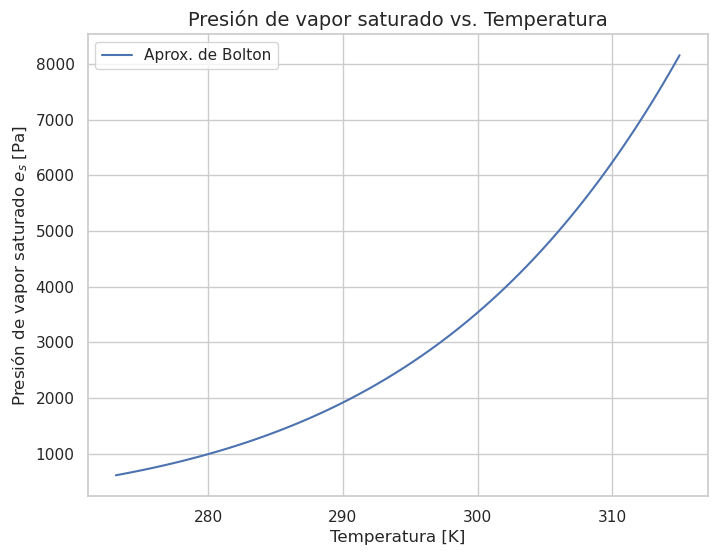

Diferencia de humedad específica de saturación entre 260 K y 315 K: 53.87 g/kg
Cambio de +1 K: 0.11 g/kg de humedad específica saturada
Cambio de +1.5 K: 0.16 g/kg de humedad específica saturada
Cambio de +2 K: 0.22 g/kg de humedad específica saturada
Cambio de +3 K: 0.32 g/kg de humedad específica saturada
Cambio de +5 K: 0.53 g/kg de humedad específica saturada


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de seaborn
sns.set(style="whitegrid")

# Constantes
R_d = 287.05  # Constante del gas para aire seco [J/(kg·K)]
R_v = 461.5   # Constante del gas para vapor de agua [J/(kg·K)]
p_surface = 1000*100  # Presión superficial en hPa
T_base = 288  # Temperatura pre-industrial en K

# Aproximación de Bolton para la presión de vapor saturado en kPa
def es_Bolton(T):
    # requiere T en degC
    a=611.2
    # regresa la presion de vapor en Pa
    return a*np.exp(T*17.67/(T+243.5))#*1000

# Humedad específica de saturación en g/kg
def specific_humidity_saturation(e_s, p):
    return 622 * e_s / (p - e_s)

# Rango de temperaturas superficiales típicas de la Tierra
T = np.linspace(273.15, 315, 100)  # Temperaturas en K

# Parte 1: Graficar la presión de vapor saturado en función de la temperatura
e_s = es_Bolton(T-273.15)  # Presión de vapor saturado en kPa
print(es_Bolton(0))
plt.figure(figsize=(8, 6))
sns.lineplot(x=T, y=e_s, label="Aprox. de Bolton", color="b")
plt.title("Presión de vapor saturado vs. Temperatura", fontsize=14)
plt.xlabel("Temperatura [K]", fontsize=12)
plt.ylabel("Presión de vapor saturado $e_s$ [Pa]", fontsize=12)
plt.grid(True)
plt.minorticks_on()
plt.legend()
plt.savefig("Bolton.png")
plt.show()

# Parte 2: Diferencia de humedad específica de saturación (g/kg)
e_s_min = es_Bolton(260-273.15)  # Presión de vapor saturado a 260 K
e_s_max = es_Bolton(315-273.15)  # Presión de vapor saturado a 315 K

q_s_min = specific_humidity_saturation(e_s_min, p_surface)
q_s_max = specific_humidity_saturation(e_s_max, p_surface)

diff_q_s = q_s_max - q_s_min  # Diferencia de humedad específica en g/kg
print(f"Diferencia de humedad específica de saturación entre 260 K y 315 K: {diff_q_s:.2f} g/kg")

# Parte 3: Diferencia de humedad específica saturada en escenarios de cambio climático
dT_scenarios = [1, 1.5, 2, 3, 5]  # Incrementos de temperatura en K
base_temp = T_base  # Temperatura pre-industrial

for delta_T in dT_scenarios:
    T_new = base_temp + delta_T
    e_s_base = es_Bolton(base_temp)  # Presión de vapor saturado a temperatura base
    e_s_new = es_Bolton(T_new)  # Presión de vapor saturado para nuevo escenario
    q_s_base = specific_humidity_saturation(e_s_base, p_surface)
    q_s_new = specific_humidity_saturation(e_s_new, p_surface)
    
    diff_q_s_scenario = q_s_new - q_s_base  # Diferencia en humedad específica
    print(f"Cambio de +{delta_T} K: {diff_q_s_scenario:.2f} g/kg de humedad específica saturada")

